# First test

Single word test (apple)

In [1]:
import numpy as np
import os
from scipy.io import wavfile
import matplotlib.pyplot as plt
from scipy import signal

path = "data_store/apple/apple01.wav"

#####################
#   Time domain
#####################
fs, x = wavfile.read(path)
print(f"fs = {fs}[Hz/s]"); 
print(f"number of samples = {x.shape[0]}")
length = x.shape[0] / fs # duration
print(f"length(duration) = {length}s")
time = np.linspace(0., length, x.shape[0])
plt.plot(time, x, label="apple01")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

fs = 8000[Hz/s]
number of samples = 2694
length(duration) = 0.33675s


<Figure size 640x480 with 1 Axes>

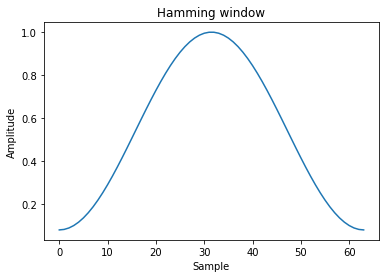

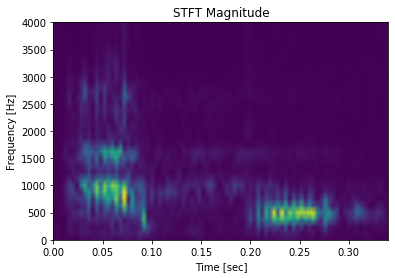

(33,) (86,)
(33, 86)


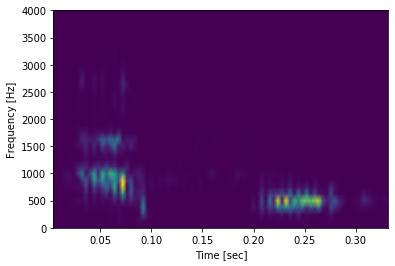

In [15]:
#####################
#   window
#####################
hamming = signal.windows.hamming(64)
plt.plot(hamming)
plt.title("Hamming window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.show()

#####################
#   Frequency domain 
#####################
f, t, Zxx = signal.stft(x, fs= fs, window= hamming, nperseg=64, noverlap=32 )# Defaults to a Hann window.
plt.pcolormesh(t, f, np.abs(Zxx), shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()
print(f.shape, t.shape)
print(Zxx.shape)
#print(Zxx[0])

#####################
#   Spectogram
#####################
f, t, Sxx = signal.spectrogram(x, fs= fs, window= hamming, nperseg=64, noverlap=32)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()


8000
(2694,)
(33, 83)
(128, 83)
(20, 83)


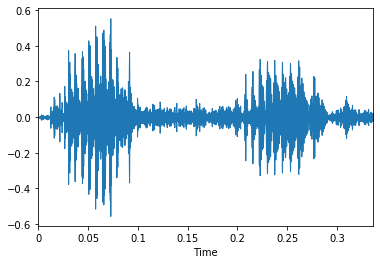

In [25]:
#####################
#   MFCC
#####################
import librosa 

x, fs = librosa.load('data_store/apple/apple01.wav', fs)
librosa.display.waveplot(x, sr=fs)
print(fs)
print(x.shape)
print(Sxx.shape)

mel_spectrogram = librosa.feature.melspectrogram(x, sr=fs, S=Sxx) 
print(mel_spectrogram.shape)


mfccs = librosa.feature.mfcc(x, sr=fs, S=mel_spectrogram, n_mfcc=20)
print(mfccs.shape)
#print(mfccs[0])